<a href="https://colab.research.google.com/github/ihatepros236/Skin-Diseases-Detection-Using-Neural-Networks-and-other-ML-Techniques/blob/main/Dermnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import pandas as pd



# Function to load images from a directory in batches
def load_images_in_batches(folder_path, batch_size=32):
    for root, _, filenames in os.walk(folder_path):
        batch_images = []
        batch_categories = []
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                img_path = os.path.join(root, filename)
                img = Image.open(img_path)
                batch_images.append(img.copy())  # Make a copy to avoid keeping the file open

                # Extract the category name from the folder name
                category = os.path.basename(root)
                batch_categories.append(category)

                if len(batch_images) == batch_size:
                    yield batch_images, batch_categories
                    batch_images = []
                    batch_categories = []
        if batch_images:
            yield batch_images, batch_categories


# Function to preprocess images
def preprocess_images_in_batches(image_batches, size=(180, 180)):
    images = []
    labels = []
    for image_batch, category_batch in image_batches:
        for img, category in zip(image_batch, category_batch):
            # Resize the image
            img = img.resize(size)

            # Convert the image to a NumPy array and preprocess it
            img = img_to_array(img)
            img = preprocess_input(img)
            images.append(img)

            # Append the category
            labels.append(category)

    # Convert lists to NumPy arrays
    images = np.array(images)
    labels = np.array(labels)

    return images, labels


# Load and preprocess training images
train_image_batches = load_images_in_batches('/content/drive/MyDrive/Colab Notebooks/data/train/')
images, labels = preprocess_images_in_batches(train_image_batches)

# Load and preprocess test images
test_image_batches = load_images_in_batches('/content/drive/MyDrive/Colab Notebooks/data/test/')
test_images, test_labels = preprocess_images_in_batches(test_image_batches)



In [ ]:
import zipfile
import os

# Path to the zip file
zip_file_path = '/content/drive/MyDrive/Colab Notebooks/data.zip'

# Destination folder where contents will be extracted
extracted_folder = '/content/drive/MyDrive/Colab Notebooks/data'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)


In [ ]:
import os

TRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/data/train'  # Replace with your train directory

for category in os.listdir(TRAIN_PATH):
    category_path = os.path.join(TRAIN_PATH, category)
    if os.path.isdir(category_path):
        num_files = len(os.listdir(category_path))
        print(f'Category: {category}, Number of images: {num_files}')


Category: Acne and Rosacea Photos, Number of images: 840
Category: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions, Number of images: 1149
Category: Atopic Dermatitis Photos, Number of images: 489
Category: Bullous Disease Photos, Number of images: 448
Category: Cellulitis Impetigo and other Bacterial Infections, Number of images: 288
Category: Eczema Photos, Number of images: 1235
Category: Exanthems and Drug Eruptions, Number of images: 404
Category: Hair Loss Photos Alopecia and other Hair Diseases, Number of images: 239
Category: Herpes HPV and other STDs Photos, Number of images: 405
Category: Light Diseases and Disorders of Pigmentation, Number of images: 568
Category: Lupus and other Connective Tissue diseases, Number of images: 420
Category: Melanoma Skin Cancer Nevi and Moles, Number of images: 463
Category: Nail Fungus and other Nail Disease, Number of images: 1040
Category: Poison Ivy Photos and other Contact Dermatitis, Number of images: 260
Category: Pso

In [ ]:
import os
import shutil

# Define paths
ORIGINAL_TRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/data/train'
FILTERED_TRAIN_PATH = '/content/drive/MyDrive/Colab Notebooks/data1/filtered_train'
TEST_PATH = '/content/drive/MyDrive/Colab Notebooks/data/test'
FILTERED_TEST_PATH = '/content/drive/MyDrive/Colab Notebooks/data1/filtered_test'

MIN_IMAGES = 450

# Create the filtered data directory if it does not exist
os.makedirs(FILTERED_TRAIN_PATH, exist_ok=True)

# Filter categories in the training set
for category in os.listdir(ORIGINAL_TRAIN_PATH):
    category_path = os.path.join(ORIGINAL_TRAIN_PATH, category)
    filtered_category_path = os.path.join(FILTERED_TRAIN_PATH, category)
    if os.path.isdir(category_path) and len(os.listdir(category_path)) >= MIN_IMAGES and not os.path.exists(filtered_category_path):
        # Copy the category directory to the filtered data directory
        shutil.copytree(category_path, filtered_category_path)

# Print number of images in each category in the filtered training set
for category in os.listdir(FILTERED_TRAIN_PATH):
    category_path = os.path.join(FILTERED_TRAIN_PATH, category)
    if os.path.isdir(category_path):
        print(f'Category: {category}, Number of images: {len(os.listdir(category_path))}')

# Filter test set to keep only categories present in the filtered training set
filtered_categories = os.listdir(FILTERED_TRAIN_PATH)
os.makedirs(FILTERED_TEST_PATH, exist_ok=True)

for category in os.listdir(TEST_PATH):
    if category in filtered_categories:
        category_path = os.path.join(TEST_PATH, category)
        filtered_category_path = os.path.join(FILTERED_TEST_PATH, category)
        if os.path.isdir(category_path) and not os.path.exists(filtered_category_path):
            # Copy the category directory to the filtered test directory
            shutil.copytree(category_path, filtered_category_path)

# Print number of images in each category in the filtered test set
for category in os.listdir(FILTERED_TEST_PATH):
    category_path = os.path.join(FILTERED_TEST_PATH, category)
    if os.path.isdir(category_path):
        print(f'Category: {category}, Number of images: {len(os.listdir(category_path))}')




Category: Acne and Rosacea Photos, Number of images: 840
Category: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions, Number of images: 1149
Category: Atopic Dermatitis Photos, Number of images: 489
Category: Eczema Photos, Number of images: 1235
Category: Light Diseases and Disorders of Pigmentation, Number of images: 568
Category: Melanoma Skin Cancer Nevi and Moles, Number of images: 463
Category: Nail Fungus and other Nail Disease, Number of images: 1040
Category: Psoriasis pictures Lichen Planus and related diseases, Number of images: 1405
Category: Seborrheic Keratoses and other Benign Tumors, Number of images: 1371
Category: Systemic Disease, Number of images: 606
Category: Tinea Ringworm Candidiasis and other Fungal Infections, Number of images: 1300
Category: Vascular Tumors, Number of images: 482
Category: Warts Molluscum and other Viral Infections, Number of images: 1086
Category: Acne and Rosacea Photos, Number of images: 312
Category: Actinic Keratosis Bas

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Constants
BATCH_SIZE = 40
EPOCHS = 50
IMG_HEIGHT = 180
IMG_WIDTH = 180

# Create ImageDataGenerators for train and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=45,
                                   width_shift_range=.15,
                                   height_shift_range=.15,
                                   horizontal_flip=True,
                                   zoom_range=0.5,
                                   validation_split=0.1)  # set validation split

train_generator = train_datagen.flow_from_directory(directory=FILTERED_TRAIN_PATH,
                                                    batch_size=BATCH_SIZE,
                                                    shuffle=True,
                                                    target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory(directory=FILTERED_TRAIN_PATH,
                                                         batch_size=BATCH_SIZE,
                                                         target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                         class_mode='categorical',
                                                         subset='validation')

# Build a simple CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(len(os.listdir(FILTERED_TRAIN_PATH)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=train_generator.samples // BATCH_SIZE,
                    validation_steps=validation_generator.samples // BATCH_SIZE,
                    epochs=EPOCHS)


Found 10836 images belonging to 13 classes.
Found 1198 images belonging to 13 classes.
Epoch 1/50
270/270 [==============================] - 125s 456ms/step - loss: 2.4307 - accuracy: 0.1737 - val_loss: 2.4541 - val_accuracy: 0.1612
Epoch 2/50
270/270 [==============================] - 124s 460ms/step - loss: 2.3119 - accuracy: 0.2116 - val_loss: 2.4290 - val_accuracy: 0.1836
Epoch 3/50
270/270 [==============================] - 119s 439ms/step - loss: 2.2512 - accuracy: 0.2302 - val_loss: 2.4137 - val_accuracy: 0.1586
Epoch 4/50
270/270 [==============================] - 121s 447ms/step - loss: 2.2034 - accuracy: 0.2484 - val_loss: 2.3883 - val_accuracy: 0.1810
Epoch 5/50
270/270 [==============================] - 120s 444ms/step - loss: 2.1599 - accuracy: 0.2643 - val_loss: 2.4030 - val_accuracy: 0.1724
Epoch 6/50
270/270 [==============================] - 119s 442ms/step - loss: 2.1239 - accuracy: 0.2782 - val_loss: 2.3963 - val_accuracy: 0.1966
Epoch 7/50
270/270 [=================

KeyboardInterrupt: ignored

In [ ]:
import os
import shutil

source_dir = "/content/drive/MyDrive/Colab Notebooks/data1/filtered_train"
destination_dir = "/content/filtered_train"

# Repeat for the test set
source_dir_test = "/content/drive/MyDrive/Colab Notebooks/data1/filtered_test"
destination_dir_test = "/content/filtered_test"

 #Ensure the destination directories don't already exist
if os.path.exists(destination_dir):
    shutil.rmtree(destination_dir)

if os.path.exists(destination_dir_test):
    shutil.rmtree(destination_dir_test)

# Copy the directories
shutil.copytree(source_dir, destination_dir)
shutil.copytree(source_dir_test, destination_dir_test)



'/content/filtered_test'

In [ ]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Parameters
IMAGE_SIZE = [180, 180]
BATCH_SIZE = 200
NUM_EPOCHS = 10
VALIDATION_SPLIT = 0.1

# Paths
TRAIN_PATH = '/content/filtered_train'
VALIDATION_PATH = '/content/filtered_test'

# Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=VALIDATION_SPLIT)  # Set validation split

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify that this is the training data
)

validation_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,  # Note: the validation data comes from the same directory as the training data
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify that this is the validation data
)

# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# Add a logistic layer
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_steps=validation_generator.samples // BATCH_SIZE
)



Found 10836 images belonging to 13 classes.
Found 1198 images belonging to 13 classes.
Epoch 1/10
54/54 [==============================] - 76s 768ms/step - loss: 2.1543 - accuracy: 0.2995 - val_loss: 67.8436 - val_accuracy: 0.1000
Epoch 2/10
54/54 [==============================] - 37s 687ms/step - loss: 1.6008 - accuracy: 0.4739 - val_loss: 24.0144 - val_accuracy: 0.1000
Epoch 3/10
54/54 [==============================] - 37s 690ms/step - loss: 1.2935 - accuracy: 0.5743 - val_loss: 2.9107 - val_accuracy: 0.1480
Epoch 4/10
54/54 [==============================] - 37s 689ms/step - loss: 1.0227 - accuracy: 0.6626 - val_loss: 2.9917 - val_accuracy: 0.1960
Epoch 5/10
54/54 [==============================] - 37s 683ms/step - loss: 0.8077 - accuracy: 0.7390 - val_loss: 3.2843 - val_accuracy: 0.2150
Epoch 6/10
54/54 [==============================] - 37s 689ms/step - loss: 0.5859 - accuracy: 0.8091 - val_loss: 3.5072 - val_accuracy: 0.2090
Epoch 7/10
54/54 [==============================] - 3

In [ ]:
import os
import shutil
import numpy as np
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Paths
DATA_PATH = '/content/filtered_train'
TRAIN_PATH = '/content/temp_train'
VALIDATION_PATH = '/content/temp_validation'

# Parameters
IMAGE_SIZE = [200, 200]
BATCH_SIZE = 225
NUM_EPOCHS = 20
L2_REG = 0.001

# Create directories
os.makedirs(TRAIN_PATH, exist_ok=True)
os.makedirs(VALIDATION_PATH, exist_ok=True)

# Split data into train and validation
subdirs = [subdir for subdir in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, subdir))]
for subdir in subdirs:
    files = [file for file in os.listdir(os.path.join(DATA_PATH, subdir)) if os.path.isfile(os.path.join(DATA_PATH, subdir, file))]
    np.random.shuffle(files)

    # Split files into 95% train, 5% validation
    split_idx = int(len(files) * 0.93)
    train_files = files[:split_idx]
    validation_files = files[split_idx:]

    # Create class directories and copy files for train set
    os.makedirs(os.path.join(TRAIN_PATH, subdir), exist_ok=True)
    for file in train_files:
        shutil.copy(os.path.join(DATA_PATH, subdir, file), os.path.join(TRAIN_PATH, subdir, file))

    # Create class directories and copy files for validation set
    os.makedirs(os.path.join(VALIDATION_PATH, subdir), exist_ok=True)
    for file in validation_files:
        shutil.copy(os.path.join(DATA_PATH, subdir, file), os.path.join(VALIDATION_PATH, subdir, file))

# Image Data Generators with data augmentation for train data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Only rescale for validation data
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load the pre-trained Xception model
base_model = Xception(weights='imagenet', include_top=False, input_shape=(*IMAGE_SIZE, 3))

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
# Add a fully-connected layer with L2 regularization
x = Dense(1024, activation='relu', kernel_regularizer=l2(L2_REG))(x)
# Add a logistic layer
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=NUM_EPOCHS,
    validation_data=validation_generator,
    steps_per_epoch = train_generator.samples // BATCH_SIZE,
    validation_steps = validation_generator.samples // BATCH_SIZE,
)




Found 11186 images belonging to 13 classes.
Found 848 images belonging to 13 classes.
Epoch 1/20
49/49 [==============================] - 149s 2s/step - loss: 2.9945 - accuracy: 0.3530 - val_loss: 5.9718 - val_accuracy: 0.1570
Epoch 2/20
49/49 [==============================] - 120s 2s/step - loss: 1.9126 - accuracy: 0.5233 - val_loss: 3.3939 - val_accuracy: 0.2311
Epoch 3/20
49/49 [==============================] - 119s 2s/step - loss: 1.4013 - accuracy: 0.6277 - val_loss: 3.1898 - val_accuracy: 0.2874
Epoch 4/20
49/49 [==============================] - 120s 2s/step - loss: 1.1018 - accuracy: 0.6859 - val_loss: 2.2079 - val_accuracy: 0.4296
Epoch 5/20
49/49 [==============================] - 119s 2s/step - loss: 0.9032 - accuracy: 0.7445 - val_loss: 2.2978 - val_accuracy: 0.4030
Epoch 6/20
49/49 [==============================] - 120s 2s/step - loss: 0.7595 - accuracy: 0.7801 - val_loss: 1.7977 - val_accuracy: 0.4785
Epoch 7/20
49/49 [==============================] - 119s 2s/step - l

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/saved_models/xception_with_l2.h5')
# Paths
TEST_PATH = '/content/filtered_test'

# Image Data Generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    TEST_PATH,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)

print('Test accuracy:', test_acc)



Found 3117 images belonging to 13 classes.
13/13 [==============================] - 10s 733ms/step - loss: 1.6135 - accuracy: 0.6465
Test accuracy: 0.6464956998825073


4/4 [==============================] - 3s 879ms/step
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.66      0.73      0.69        59
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.67      0.53      0.59        81
                                          Atopic Dermatitis Photos       0.67      0.40      0.50        35
                                                     Eczema Photos       0.54      0.78      0.64        87
                      Light Diseases and Disorders of Pigmentation       0.57      0.33      0.41        40
                               Melanoma Skin Cancer Nevi and Moles       0.76      0.58      0.66        33
                                Nail Fungus and other Nail Disease       0.98      0.75      0.85        73
             Psoriasis pictures Lichen Planus and related diseases       0.57     

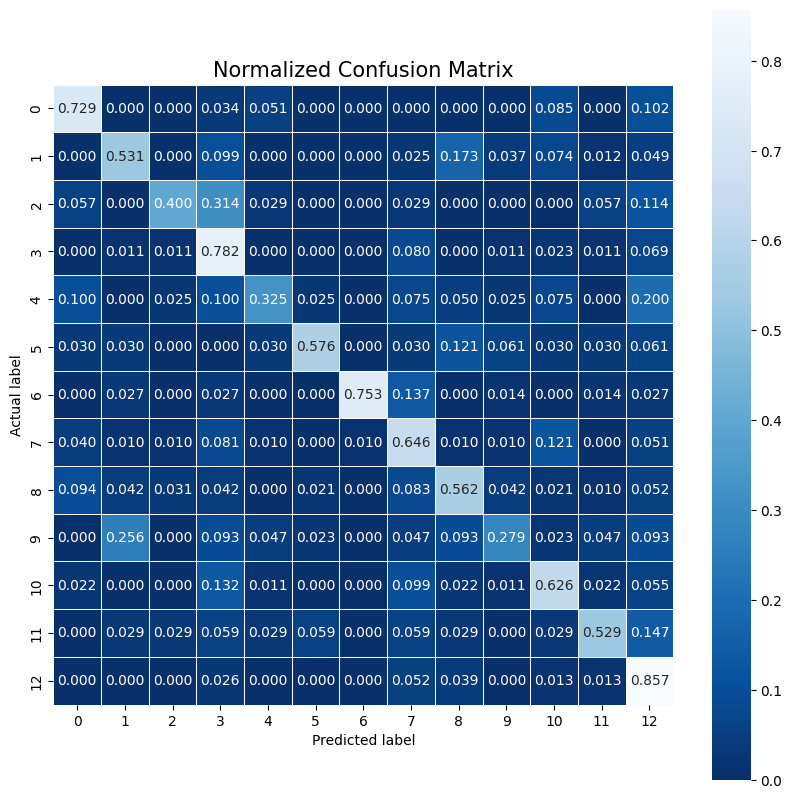

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get the true labels from the validation generator
y_true = np.array([])
for i in range(len(validation_generator)):
    _, labels_batch = validation_generator[i]
    y_true = np.append(y_true, labels_batch.argmax(axis=1))

# Get the predicted labels as probabilities
y_pred_prob = model.predict(validation_generator)

# Convert the probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute the classification report
report = classification_report(y_true, y_pred, target_names=validation_generator.class_indices.keys())

print(report)

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Visualize the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix', size=15)
plt.show()



In [ ]:
import os
from PIL import Image
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Function to load images from a directory in batches
def load_images_and_labels(folder_path, img_size=(200,200), batch_size=35):
    images = []
    labels = []
    for root, _, filenames in os.walk(folder_path):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
                img_path = os.path.join(root, filename)

                # Open the image file and resize it
                img = cv2.imread(img_path)
                img = cv2.resize(img, img_size)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Convert the image pixels to a numpy array
                img_array = img_to_array(img)

                images.append(img_array)

                # Extract the category name from the folder name
                category = os.path.basename(root)
                labels.append(category)

    # Convert lists to numpy arrays for better performance
    images = np.array(images, dtype='float32')
    labels = np.array(labels)

    # Perform one hot encoding on the labels since the labels are categorical
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

    return train_test_split(images, labels, test_size=0.1, random_state=42)



TRAIN_PATH = '/content/filtered_train'
TEST_PATH = '/content/filtered_test'

# Load the train data
X_train, X_val, y_train, y_val = load_images_and_labels(TRAIN_PATH)

# Load the test data
X_test, _, y_test, _ = load_images_and_labels(TEST_PATH)

# Normalize pixel values to be between 0 and 1
X_train, X_val, X_test = X_train / 255.0, X_val / 255.0, X_test / 255.0

print(f"X_train shape: {X_train.shape}")
print(f"X_val shape: {X_val.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_val shape: {y_val.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (10830, 200, 200, 3)
X_val shape: (1204, 200, 200, 3)
X_test shape: (2805, 200, 200, 3)
y_train shape: (10830,)
y_val shape: (1204,)
y_test shape: (2805,)


In [ ]:
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

# Parameters
IMG_HEIGHT, IMG_WIDTH = 200, 200  # Replace with the size of your images
NUM_CLASSES = 13  # Replace with the number of your classes

# Instantiate a ResNet50 model with pre-trained ImageNet weights
resnet_model = ResNet50(include_top=False, weights='imagenet', pooling='avg', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Disable training for the ResNet50 model layers
for layer in resnet_model.layers:
    layer.trainable = False

# A dummy input to build the model
dummy_x = tf.zeros((1, IMG_HEIGHT, IMG_WIDTH, 3))

# Build the model
_ = resnet_model(dummy_x)

# Check the output shape of the model
print(resnet_model.output_shape)

# Extract features from the train, validation, and test datasets with batch_size of 30
X_train_features = resnet_model.predict(X_train, batch_size=16)
X_val_features = resnet_model.predict(X_val, batch_size=16)
X_test_features = resnet_model.predict(X_test, batch_size=16)


# Check the shapes of the new feature datasets
print(f"X_train_features shape: {X_train_features.shape}")
print(f"X_val_features shape: {X_val_features.shape}")
print(f"X_test_features shape: {X_test_features.shape}")



(None, 2048)
176/176 [==============================] - 3s 15ms/step
X_train_features shape: (10830, 2048)
X_val_features shape: (1204, 2048)
X_test_features shape: (2805, 2048)


In [ ]:
from sklearn.decomposition import PCA

# Reshape the features to (num_samples, 6 * 6 * 2048)
def reshape_features(features):
    return features.reshape((features.shape[0], -1))

X_train_flat = reshape_features(X_train_features)
X_val_flat = reshape_features(X_val_features)
X_test_flat = reshape_features(X_test_features)

print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_val_flat shape: {X_val_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")

# Apply PCA on the reshaped features
pca = PCA(n_components=200)

# Fit on training data and transform the validation and test datasets
X_train_pca = pca.fit_transform(X_train_flat)
X_val_pca = pca.transform(X_val_flat)
X_test_pca = pca.transform(X_test_flat)

print(f"X_train_pca shape: {X_train_pca.shape}")
print(f"X_val_pca shape: {X_val_pca.shape}")
print(f"X_test_pca shape: {X_test_pca.shape}")

X_train_flat shape: (10830, 2048)
X_val_flat shape: (1204, 2048)
X_test_flat shape: (2805, 2048)
X_train_pca shape: (10830, 200)
X_val_pca shape: (1204, 200)
X_test_pca shape: (2805, 200)


In [ ]:

from lazypredict.Supervised import LazyClassifier

# Instantiate and fit the LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train_pca, X_val_pca, y_train, y_val)

# Display the models performance
print(models)

100%|██████████| 29/29 [15:23<00:00, 31.86s/it]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
XGBClassifier                      0.32               0.27    None      0.30   
LGBMClassifier                     0.31               0.27    None      0.30   
NearestCentroid                    0.25               0.25    None      0.25   
RandomForestClassifier             0.30               0.24    None      0.27   
ExtraTreesClassifier               0.30               0.24    None      0.27   
QuadraticDiscriminantAnalysis      0.26               0.24    None      0.25   
SVC                                0.29               0.23    None      0.26   
LogisticRegression                 0.26               0.23    None      0.25   
LinearDiscriminantAnalysis         0.26               0.22    None      0.25   
LinearSVC                          0.26               0.22    None      0.24   
BernoulliNB                        0.24 